In [1]:
import sympy as sp
import numpy as np
from sympy import symbols
sf = sp.SingularityFunction
import matplotlib.pyplot as plt

In [2]:
E, I = symbols('E, I')
x = symbols('x')

In [3]:
## het oplossen van differentiaal vergelijking

## in x-richting

# Define the symbols
cv, cn, qx, qz, theta = sp.symbols('cv, cn, qx, qz, theta')  ## cv = dv/dx, cn = dn/dx

# Define the equations
eq1 = (qx * sp.tan(theta)) + (sp.sin(theta) * cv) + (sp.cos(theta) * cn)
eq2 = (qz) + (sp.cos(theta) * cv) - (sp.sin(theta) * cn)

# Solve the system of equations
solution = sp.solve((eq1, eq2), (cv, cn))

# Display the solution
print("Solution in the x-direction:")
print("dV/dx =", solution[cv])
print("dN/dx =", solution[cn])

Solution in the x-direction:
dV/dx = -qx*sin(theta)*tan(theta) - qz*cos(theta)
dN/dx = (-qx + qz)*sin(theta)


In [4]:
##  in z-ricting

# Define the symbols
cv_z, cn_z, qx, qz, theta = sp.symbols('cv_z cn_z qx qz theta')

# Define the equations
eq1 = (qx) + (sp.sin(theta) * cv_z) + (sp.cos(theta) * cn_z)
eq2 = (qz / (sp.tan(theta))) + (sp.cos(theta) * cv_z) - (sp.sin(theta) * cn_z)

# Solve the system of equations
solution = sp.solve((eq1, eq2), (cv_z, cn_z))

# Display the solution
print("Solution in z-direction:")
print("dV/dz =", solution[cv_z])
print("dN/dz =", solution[cn_z])

Solution in z-direction:
dV/dz = -qx*sin(theta) + qz*sin(theta) - qz/sin(theta)
dN/dz = (-qx + qz)*cos(theta)


In [5]:
## Voorbeeld 1: opgelegd op twee steunpunten

Cv, Cm, Cphi, Cw, Av, Bv = sp.symbols('Cv, Cm, Cphi, Cw, Av, Bv')

# Define F and l
F = 10  ## KN
l = 4   ## m
theta = sp.atan(1/2)

# Define qz and qx
qz = -Av * sf(x, 0, -1) + F * sf(x, l/2, -1) - Bv * sf(x, l, -1)
qx = 0

# Define V as a function of x
V1 = sp.cos(theta) * sp.integrate( -qz , x)
V2 = sp.integrate(- (sp.sin(theta) * sp.tan(theta) * qx), x) + Cv
V = V1 + V2

# Define M as an integral of V
M = sp.integrate(V / sp.cos(theta), x) + Cm

# Define phi as an integral of M
phi = sp.integrate(M, x) + Cphi

# Define W as an integral of -phi
W = sp.integrate(-phi, x) + Cw


# Display the expressions
print("V:", V)
print("M:", M)
print("phi:", phi)
print("W:", W)

V: 0.894427190999916*Av*SingularityFunction(x, 0, 0) + 0.894427190999916*Bv*SingularityFunction(x, 4, 0) + Cv - 8.94427190999916*SingularityFunction(x, 2.0, 0)
M: 1.0*Av*SingularityFunction(x, 0, 1) + 1.0*Bv*SingularityFunction(x, 4, 1) + Cm + 1.11803398874989*Cv*x - 10.0*SingularityFunction(x, 2.0, 1)
phi: 0.5*Av*SingularityFunction(x, 0, 2) + 0.5*Bv*SingularityFunction(x, 4, 2) + Cm*x + Cphi + 0.559016994374947*Cv*x**2 - 5.0*SingularityFunction(x, 2.0, 2)
W: -0.166666666666667*Av*SingularityFunction(x, 0, 3) - 0.166666666666667*Bv*SingularityFunction(x, 4, 3) - Cm*x**2/2 - Cphi*x - 0.186338998124982*Cv*x**3 + Cw + 1.66666666666667*SingularityFunction(x, 2.0, 3)


In [6]:
## Voorwarden

eq1 = V.subs(x, -1)
eq2 = V.subs(x, l+1) 

eq3 = M.subs(x, 0)
eq4 = M.subs(x, l)

eq5 = W.subs(x, l)
eq6 = W.subs(x, 0)

equations = [eq1 -0, eq2-0,eq3-0,eq4-0,eq5-0,eq6-0]
solutions = sp.solve(equations, (Cv, Cm, Cphi, Cw, Av, Bv))

In [7]:
print(solutions)

{Cv: 0.0, Cm: 0.0, Cphi: -10.0000000000000, Cw: 0.0, Av: 5.00000000000000, Bv: 5.00000000000000}


In [8]:
Cv, Cm, Cphi, Cw, Av, Bv = 0,0, -10, 0, 5, 5

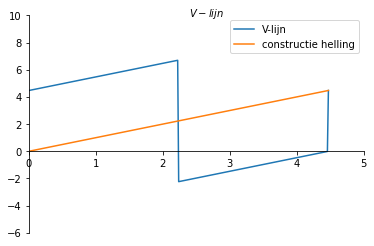

In [9]:
x_val = np.linspace(0, l, 301)
V_list = []
for i in x_val:
    V_list.append(sp.cos(theta) * (Av * sf(i, 0, 0) - F * sf(i, l/2, 0) + Bv * sf(i, l, 0)))
#print(V_list)
#plt.plot(x_val/sp.cos(theta),np.array(V_list));

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 5)
ax.set_ylim(-6, 10)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$V-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta), np.array(V_list)+ x_val/sp.cos(theta), label='V-lijn')
ax.plot(x_val/sp.cos(theta), x_val/sp.cos(theta), label='constructie helling')
ax.legend();

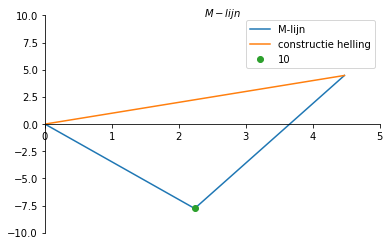

In [10]:
x_val = np.linspace(0, 4, 201)
M_list = []
for i in x_val:
    M_list.append((Av * sf(i, 0, 1) - F * sf(i, l/2, 1) + Bv * sf(i, l, 1)))
#print(M_list)
#print(M_list)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 5)
ax.set_ylim(-10, 10)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$M-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta), -np.array(M_list) + x_val/sp.cos(theta), label='M-lijn')
ax.plot(x_val/sp.cos(theta), x_val/sp.cos(theta), label='constructie helling')
plt.plot(x_val[100]/sp.cos(theta), - np.max(M_list) + x_val[100]/sp.cos(theta) , 'o', label =f'{np.max(M_list):.0f}')
ax.legend();

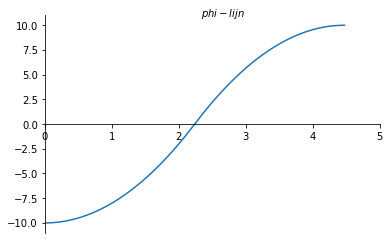

In [11]:
x_val = np.linspace(0, 4, 201)
phi_list = []
for i in x_val:
    phi_list.append((Av/2) * sf(i, 0, 2) - (F/2) * sf(i, l/2, 2) + (Bv/2) * sf(i, l, 2) + Cphi)

#plt.plot(x_val/sp.cos(theta), np.array(phi_list))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 5)
ax.set_ylim(-11, 11)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$phi-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta), np.array(phi_list));

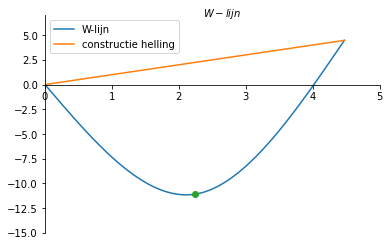

In [12]:
x_val = np.linspace(0, 4, 201)
W_list = []
for i in x_val:
    W_list.append((-Av/6) * sf(i, 0, 3) + (F/6) * sf(i, l/2, 3) + (Bv/6) * sf(i, l, 3) - Cphi*i)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 5)
ax.set_ylim(-15, 7)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$W-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta), - np.array(W_list) +  x_val/sp.cos(theta), label='W-lijn')
ax.plot(x_val/sp.cos(theta), x_val/sp.cos(theta), label='constructie helling')
plt.plot(x_val[100]/sp.cos(theta), -(np.max(W_list) - x_val[100]/ sp.cos(theta)), 'o')
ax.legend();

In [13]:
## voorbeeld 2: ingeklemde liggeer

Cv, Cm, Cphi, Cw, Av, MA = sp.symbols('Cv, Cm, Cphi, Cw, Av, MA')

# Define F and l
F = 10  ## KN
l = 4   ## m
theta = sp.atan(1/2)

# Define qz and qx
qz = -Av * sf(x, 0, -1) + MA * sf(x, 0, -2) + F * sf(x, l, -1)
qx = 0

# Define V as a function of x
V1 = sp.cos(theta) * sp.integrate( -qz , x)
V2 = sp.integrate(- (sp.sin(theta) * sp.tan(theta) * qx), x) + Cv
V = V1 + V2

# Define M as an integral of V
M = sp.integrate(V / sp.cos(theta), x) + Cm

# Define phi as an integral of M
phi = sp.integrate(M, x) + Cphi

# Define W as an integral of -phi
W = sp.integrate(-phi, x) + Cw


# Display the expressions
print("V:", V)
print("M:", M)
print("phi:", phi)
print("W:", W)

V: 0.894427190999916*Av*SingularityFunction(x, 0, 0) + Cv - 0.894427190999916*MA*SingularityFunction(x, 0, -1) - 8.94427190999916*SingularityFunction(x, 4, 0)
M: 1.0*Av*SingularityFunction(x, 0, 1) + Cm + 1.11803398874989*Cv*x - 1.0*MA*SingularityFunction(x, 0, 0) - 10.0*SingularityFunction(x, 4, 1)
phi: 0.5*Av*SingularityFunction(x, 0, 2) + Cm*x + Cphi + 0.559016994374947*Cv*x**2 - 1.0*MA*SingularityFunction(x, 0, 1) - 5.0*SingularityFunction(x, 4, 2)
W: -0.166666666666667*Av*SingularityFunction(x, 0, 3) - Cm*x**2/2 - Cphi*x - 0.186338998124982*Cv*x**3 + Cw + 0.5*MA*SingularityFunction(x, 0, 2) + 1.66666666666667*SingularityFunction(x, 4, 3)


In [14]:
eq1 = V.subs(x, -1)
eq2 = V.subs(x, l-1) 

eq3 = M.subs(x, -1)
eq4 = M.subs(x, l)

eq5 = W.subs(x, 0)
eq6 = phi.subs(x, 0)

equations = [eq1 -0, eq2- F*sp.cos(theta),eq3-0,eq4-0,eq5-0,eq6-0]
solutions = sp.solve(equations, (Cv, Cm, Cphi, Cw, Av, MA))

In [15]:
print(solutions)

{Cv: 0.0, Cm: 0.0, Cphi: 0.0, Cw: 0.0, Av: 10.0000000000000, MA: 40.0000000000000}


In [16]:
Cv, Cm, Cphi, Cw, Av, MA = 0, 0, 0, 0, 10, 40

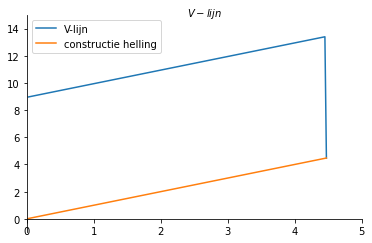

In [17]:
x_val = np.linspace(0, l, 201)

V_list = []

for i in x_val:
    V_list.append(sp.cos(theta) * (Av * sf(i, 0, 0) - MA * sf(i, 0, -1) - F * sf(i, l, 0)) + Cv)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 5)
ax.set_ylim(-1, 15)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$V-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
ax.plot(x_val/sp.cos(theta), np.array(V_list)+ x_val/sp.cos(theta), label='V-lijn')
ax.plot(x_val/sp.cos(theta), x_val/sp.cos(theta), label='constructie helling')
ax.legend();

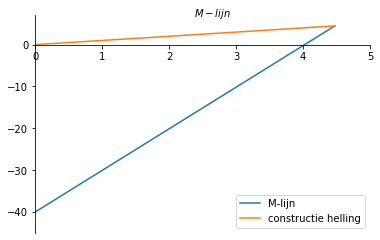

In [18]:
x_val = np.linspace(0, 4, 201)
M_list = []
for i in x_val:
    M_list.append(((Av * sf(i, 0, 1) - MA * sf(i, 0, 0) - F * sf(i, l, 1))))


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 5)
ax.set_ylim(-45, 7)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$M-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta), np.array(M_list) + x_val/sp.cos(theta), label='M-lijn')
ax.plot(x_val/sp.cos(theta), x_val/sp.cos(theta), label='constructie helling')
ax.legend();

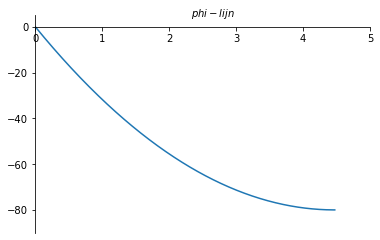

In [19]:
x_val = np.linspace(0, 4, 501)
phi_list = []
for i in x_val:
    phi_list.append(((Av/2) * sf(i, 0, 2) - MA * sf(i, 0, 1) - (F/2) * sf(i, l, 2) ))
#print(phi_list)
#plt.plot(x_val/sp.cos(theta), np.array(phi_list))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 5)
ax.set_ylim(-90, 5)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$phi-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta), np.array(phi_list));

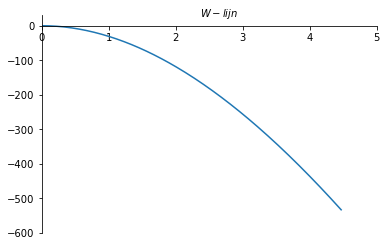

In [20]:
x_val = np.linspace(0, 4, 201)
W_list = []
for i in x_val:
    W_list.append(-(Av/6) * sf(i, 0, 3) + MA * sf(i, 0, 2) + (F/6) * sf(i, l, 3))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 5)
ax.set_ylim(-600, 30)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$W-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/sp.cos(theta), - np.array(W_list) );

In [21]:
## Voorbeeld 3: ingeklemde ligger belast met een horizontale kracht

Cv, Cm, Cphi, Cw, Av, MA, Cn, Ah = sp.symbols('Cv, Cm, Cphi, Cw, Av, MA, Cn, Ah ')

# Define F and l
F = 10  ## KN
l = 4   ## m
theta = sp.atan(1/2)

# Define qz and qx
qz = Av * sf(x, 0, -1) + MA * sf(x, 0, -2)
qx = Ah * sf(x, 0, -1) - F * sf(x, l, -1)

# Define V as a function of x
V1 = sp.cos(theta) * sp.integrate( -qz , x)
V2 = sp.integrate(-(sp.sin(theta) * sp.tan(theta) * qx), x) + Cv
V = V1 + V2

# Define M as an integral of V
M = sp.integrate(V / sp.cos(theta), x) + Cm

# Define phi as an integral of M
phi = sp.integrate(M, x) + Cphi

# Define W as an integral of -phi
W = sp.integrate(-phi, x) + Cw

N = sp.integrate(sp.sin(theta) * (-qx + qz), x) + Cn

# Display the expressions
print("V:", V)
print("M:", M)
print("phi:", phi)
print("W:", W)
print("N:", N)

V: -0.223606797749979*Ah*SingularityFunction(x, 0, 0) - 0.894427190999916*Av*SingularityFunction(x, 0, 0) + Cv - 0.894427190999916*MA*SingularityFunction(x, 0, -1) + 2.23606797749979*SingularityFunction(x, 4, 0)
M: -0.25*Ah*SingularityFunction(x, 0, 1) - 1.0*Av*SingularityFunction(x, 0, 1) + Cm + 1.11803398874989*Cv*x - 1.0*MA*SingularityFunction(x, 0, 0) + 2.5*SingularityFunction(x, 4, 1)
phi: -0.125*Ah*SingularityFunction(x, 0, 2) - 0.5*Av*SingularityFunction(x, 0, 2) + Cm*x + Cphi + 0.559016994374947*Cv*x**2 - 1.0*MA*SingularityFunction(x, 0, 1) + 1.25*SingularityFunction(x, 4, 2)
W: 0.0416666666666667*Ah*SingularityFunction(x, 0, 3) + 0.166666666666667*Av*SingularityFunction(x, 0, 3) - Cm*x**2/2 - Cphi*x - 0.186338998124982*Cv*x**3 + Cw + 0.5*MA*SingularityFunction(x, 0, 2) - 0.416666666666667*SingularityFunction(x, 4, 3)
N: -0.447213595499958*Ah*SingularityFunction(x, 0, 0) + 0.447213595499958*Av*SingularityFunction(x, 0, 0) + Cn + 0.447213595499958*MA*SingularityFunction(x, 0, -1

In [22]:
eq1 = V.subs(x, -1)
eq2 = V.subs(x, l-1) 

eq3 = M.subs(x, -1)
eq4 = M.subs(x, l)

eq5 = W.subs(x, 0)
eq6 = phi.subs(x, 0)

eq7 = N.subs(x, -1)
eq8 = N.subs(x, l-1)

## nog een vergelijking noding

equations = [eq1 - 0, eq2 + F* (sp.sin(theta)), eq3 - 0, eq4 - 0, eq5 - 0, eq6 - 0, eq7 - 0, eq8 + F * sp.cos(theta)]
solutions = sp.solve(equations, (Cv, Cm, Cphi, Cw, Av, MA, Cn, Ah))

In [23]:
print(solutions)

{Cv: 0.0, Cm: 0.0, Cphi: 0.0, Cw: 0.0, Av: 0.0, MA: -20.0000000000000, Cn: 0.0, Ah: 20.0000000000000}


In [24]:
## voorbeeld 4

Cv, Cm, Cphi, Cw, Av, MA, Cn, Ah, Bv = sp.symbols('Cv, Cm, Cphi, Cw, Av, MA, Cn, Ah , Bv')

# Define F and l
F = 10  ## KN
l = 4   ## m
theta = sp.atan(1/2)

# Define qz and qx
qz = - Av * sf(x, 0, -1) + MA * sf(x, 0, -2) - Bv * sf(x, l, -1)
qx = Ah * sf(x, 0, -1) - F * sf(x, l/2, -1)

# Define V as a function of x
V1 = sp.cos(theta) * sp.integrate( -qz , x)
V2 = sp.integrate(-(sp.sin(theta) * sp.tan(theta) * qx), x) + Cv
V = V1 + V2

# Define M as an integral of V
M = sp.integrate(V / sp.cos(theta), x) + Cm

# Define phi as an integral of M
phi = sp.integrate(M, x) + Cphi

# Define W as an integral of -phi
W = sp.integrate(-phi, x) + Cw

N = sp.integrate(sp.sin(theta) * (-qx + qz), x) + Cn

# Display the expressions
print("V:", V)
print("M:", M)
print("phi:", phi)
print("W:", W)
print("N:", N)

V: -0.223606797749979*Ah*SingularityFunction(x, 0, 0) + 0.894427190999916*Av*SingularityFunction(x, 0, 0) + 0.894427190999916*Bv*SingularityFunction(x, 4, 0) + Cv - 0.894427190999916*MA*SingularityFunction(x, 0, -1) + 2.23606797749979*SingularityFunction(x, 2.0, 0)
M: -0.25*Ah*SingularityFunction(x, 0, 1) + 1.0*Av*SingularityFunction(x, 0, 1) + 1.0*Bv*SingularityFunction(x, 4, 1) + Cm + 1.11803398874989*Cv*x - 1.0*MA*SingularityFunction(x, 0, 0) + 2.5*SingularityFunction(x, 2.0, 1)
phi: -0.125*Ah*SingularityFunction(x, 0, 2) + 0.5*Av*SingularityFunction(x, 0, 2) + 0.5*Bv*SingularityFunction(x, 4, 2) + Cm*x + Cphi + 0.559016994374947*Cv*x**2 - 1.0*MA*SingularityFunction(x, 0, 1) + 1.25*SingularityFunction(x, 2.0, 2)
W: 0.0416666666666667*Ah*SingularityFunction(x, 0, 3) - 0.166666666666667*Av*SingularityFunction(x, 0, 3) - 0.166666666666667*Bv*SingularityFunction(x, 4, 3) - Cm*x**2/2 - Cphi*x - 0.186338998124982*Cv*x**3 + Cw + 0.5*MA*SingularityFunction(x, 0, 2) - 0.416666666666667*Singu

In [25]:
eq1 = V.subs(x, -1)
eq2 = V.subs(x, l+1) 

eq3 = M.subs(x, -1)
eq4 = M.subs(x, l)

eq5 = W.subs(x, 0)
eq6 = phi.subs(x, 0)

eq7 = N.subs(x, -1)
eq8 = W.subs(x, l)

##  eq9 =  nog een vergelijking noding
equations = [eq1 - 0, eq2 - 0 , eq3 - 0, eq4 - 0, eq5 - 0, eq6 - 0, eq7 - 0, eq8 -0 ] #eq9  ]
solutions = sp.solve(equations, (Cv, Cm, Cphi, Cw, Av, MA, Cn, Ah, Bv))

In [26]:
print(solutions)

{Bv: -0.781250000000000, Cn: 0.0, Cphi: 0.0, Cw: 0.0, MA: -1.87500000000000, Cm: 0.0, Av: 0.25*Ah - 1.71875, Cv: 0.0}
